## Observations and Insights 

In [1]:
##Observations on this sample:

#1. The data demonstrates that the studies looked at roughly simliar sample sizes,
#and those sample sizes were distributed roughly evenly between male and female subjects. This
#suggests that the results of those studies can be directly compared to each other for analysis.

#2. If we can judge success by the diminishing size of a tumor, then regimen "Ramicane" 
#seems to have performed the most effectively. Mice on Ramicane had slightly more variation than
#mice on Capomulin (IQR of 9.10 to 7.78 respectively), though both were significantly tighter 
#than Ceftamin or Infubinol. However, Ramicane's lower bound and average decrease were both 
#lower than that of Capomulin, both suggesting that the Ramicane treatment is the best treatment
#for shrinking tumors over all.

#3. There is a significant correlation between heavier mice and heavier tumor sizes 
#(Pearson's of 0.84). However the data does not indicate that there is a strong correlation 
#between the size of the tumor and the number of Metastatic Sites (Pearson's of -0.31), suggesting
#that it may be a question of proportion rather than a sign that heavier mice have more 
#aggressive tumors.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
unique_mice = merge_df["Mouse ID"].nunique()
unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# (group by mouse ID and Timepoint, find count. 
duplicate_gb = merge_df.groupby(["Mouse ID", "Timepoint"]).count()
duplicate_mice = duplicate_gb.sort_values("Sex", ascending = False)
duplicate_mice.head(10)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
a203     0                     1    1           1           1   
q633     0                     1    1           1           1   
q610     20                    1    1           1           1   
         25                    1    1           1           1   
         30                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
a203     0                           1                 1  
q633     0                           1                 1  
q610     20                          1                 1  
         25                          1                 1  
         30                          1                 1

In [5]:
##anything with a count of more than 1 is a duplicate
#from our sorted dataframe above, 2 is the max value.
#code to determine the Mouse ID of any mouse with duplicated values:

duplicate_mice.loc[duplicate_mice["Drug Regimen"] == 2,:]


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2

In [6]:
# >>>>>>> Conclusion: Mouse ID g989 is the only mouse with duplicated data <<<<<<<<<

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

merge_df.loc[merge_df["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
combined_clean.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
total_mice = combined_clean["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_drug = combined_clean.groupby("Drug Regimen")

mean_tumor = summary_drug["Tumor Volume (mm3)"].mean()
median_tumor = summary_drug["Tumor Volume (mm3)"].median()
var_tumor = summary_drug["Tumor Volume (mm3)"].var()
std_tumor = summary_drug["Tumor Volume (mm3)"].std()
sem_tumor = summary_drug["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.

drugreg_summary = pd.DataFrame(
    {"Mean tumor Size" : mean_tumor,
     "Median Tumor Size": median_tumor,
     "Tumor Variance": var_tumor,
     "Tumor Standard Dev" : std_tumor,
     "Tumor SEM": sem_tumor
    }
)
drugreg_summary


,Mean tumor Size,Median Tumor Size,Tumor Variance,Tumor Standard Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen using the aggregation method, produce 
# the same summary statistics in a single line

drugreg2_df = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

drugreg2_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

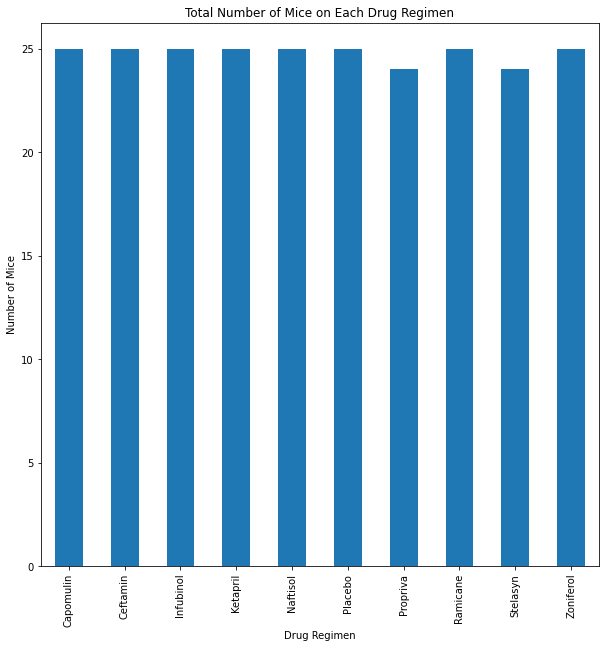

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

MouseID = combined_clean.groupby("Drug Regimen")["Mouse ID"].nunique()
MouseID.plot(kind = 'bar', figsize=(10,10))
plt.title("Total Number of Mice on Each Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

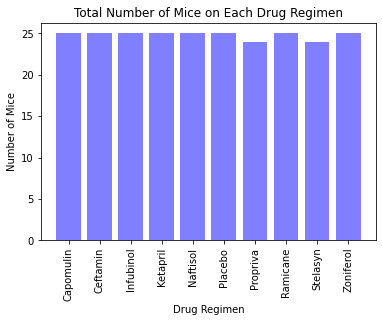

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#set x_axis to groupby in previous step
x_axis = range(combined_clean["Drug Regimen"].nunique())

#set y axis to data from MouseID
#MouseID = combined_clean.groupby("Drug Regimen")["Mouse ID"].nunique()
y_axis = MouseID

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

#find index names, return sorted to match sorted data
drugs = sorted(combined_clean["Drug Regimen"].unique())

plt.xticks(x_axis, drugs, rotation= 90) 

plt.title("Total Number of Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

MouseSex = combined_clean.groupby("Sex")["Mouse ID"].nunique()

#check distribution by values
print(MouseSex)

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


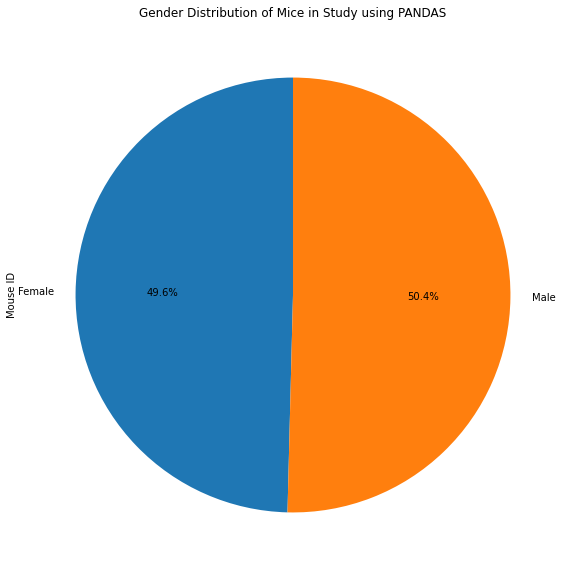

In [15]:
MouseSex.plot(kind = 'pie', y='Sex', figsize=(10,10), startangle=90, autopct='%1.1f%%')
plt.title("Gender Distribution of Mice in Study using PANDAS")
plt.show()

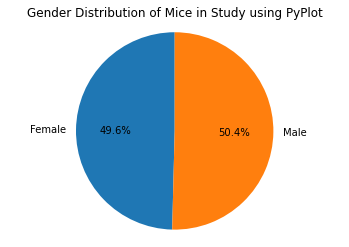

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

sexes = ["Female", "Male"]
sizes = MouseSex
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=sexes, autopct='%1.1f%%',
        shadow=False, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal') 

plt.title("Gender Distribution of Mice in Study using PyPlot")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume
# of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

## Start by getting the last (greatest) timepoint for each mouse

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_time_df = combined_clean.groupby("Mouse ID").agg({"Timepoint":"max"})

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_df = pd.merge(final_time_df, combined_clean, on=["Timepoint", "Mouse ID"])

last_final_tumor_df = final_tumor_df.loc[(final_tumor_df["Drug Regimen"] == "Capomulin") | (final_tumor_df["Drug Regimen"] =="Ceftamin")| 
                                         (final_tumor_df["Drug Regimen"] =="Ramicane") | 
                                      (final_tumor_df["Drug Regimen"] ==   "Infubinol"), :]
last_final_tumor_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
3,45,a275,Ceftamin,Female,20,28,62.999356,3
6,45,a411,Ramicane,Male,3,22,38.407618,1
7,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,45,y769,Ceftamin,Female,6,27,68.594745,4
239,45,y793,Capomulin,Male,17,17,31.896238,2
240,45,y865,Ceftamin,Male,23,26,64.729837,3
244,45,z578,Ramicane,Male,11,16,30.638696,0


In [18]:
# Put treatments into a list for a for loop (and later for plot labels)

treatment_list = last_final_tumor_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

final_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq_list = []
upperq_list = []
iqr_list = []
lower_bound_list = []
upper_bound_list = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    treatment_df = last_final_tumor_df.loc[last_final_tumor_df["Drug Regimen"] == treatment]
    final_volume.append(treatment_df["Tumor Volume (mm3)"])
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
# add subset &    
# Determine outliers using upper and lower bound
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)
    
quartiles_df = pd.DataFrame({"Treatment": treatment_list,
        "lowerq": lowerq_list,
        "upperq": upperq_list,
        "IQR" : iqr_list,
        "Lower Bound": lower_bound_list,
        "Upper Bound": upper_bound_list
        })

quartiles_df

,Treatment,lowerq,upperq,IQR,Lower Bound,Upper Bound
0,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
1,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458
2,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
3,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015


<function matplotlib.pyplot.show(close=None, block=None)>

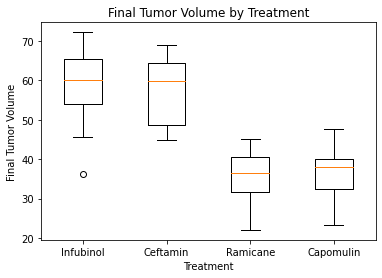

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(final_volume, labels = treatment_list)
plt.title("Final Tumor Volume by Treatment")
plt.ylabel('Final Tumor Volume')
plt.xlabel('Treatment')
plt.show

## Line and Scatter Plots

Text(0.5, 0, 'Time')

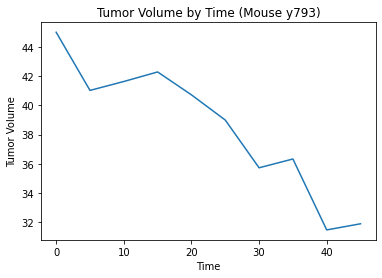

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "y793"
tumor_time_df = combined_clean.loc[combined_clean["Mouse ID"] == mouse_id]
plt.plot(tumor_time_df["Timepoint"], tumor_time_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume by Time (Mouse y793)")
plt.ylabel('Tumor Volume')
plt.xlabel('Time')


Text(0.5, 0, 'Mouse Weight')

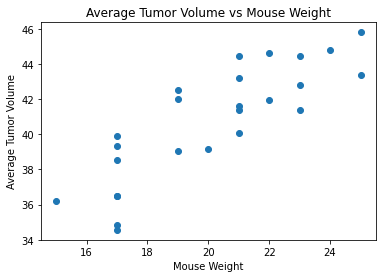

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight = combined_clean[combined_clean["Drug Regimen"]=="Capomulin"]
avg_cap = tumor_weight.groupby("Mouse ID").mean()

plt.scatter(avg_cap["Weight (g)"], avg_cap['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.ylabel('Average Tumor Volume')
plt.xlabel('Mouse Weight')

In [22]:
tumor_weight

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [24]:
correlation = st.pearsonr(avg_cap["Weight (g)"], avg_cap['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

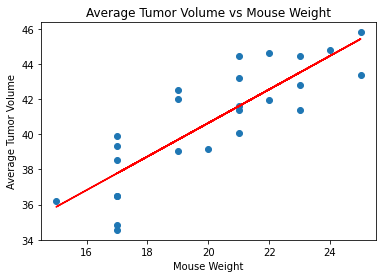

In [25]:
plt.scatter(avg_cap["Weight (g)"], avg_cap['Tumor Volume (mm3)'])

#Add the linear regression nequation and line to plot
x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Tumor Volume (mm3)"]

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope +intercept

plt.plot(x_values, regress_values, "r-")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.show

In [26]:
## Additional comparision: Age & Tumor Size?


In [27]:
correlation2 = st.pearsonr(tumor_weight["Age_months"], tumor_weight['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation2[0],2)}")

The correlation between both factors is -0.02


In [28]:
# Additional comparision: correlation between size and number of metastic sites?

correlation3 = st.pearsonr(tumor_weight["Metastatic Sites"], tumor_weight['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation3[0],2)}")

The correlation between both factors is -0.31
